In [32]:
%pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## Import necessary libs

In [33]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
 


In [34]:
iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')
target_names = iris.target_names

In [35]:
print("Iris overview: ")
print(f"Dataset shape: {x.shape}")
print(f"Traget classes: {target_names}")
print("\nFirst 5 rows of features: ")
print(x.head())
print("\nTarget distribution: ")
print(y.value_counts())

Iris overview: 
Dataset shape: (150, 4)
Traget classes: ['setosa' 'versicolor' 'virginica']

First 5 rows of features: 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target distribution: 
species
0    50
1    50
2    50
Name: count, dtype: int64


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42, stratify=y)
print(f"\nTraining set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")


Training set size: 105
Test set size: 45


In [37]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [38]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_scaled,y_train)

y_pred = knn.predict(x_test_scaled)
y_pred_proba= knn.predict_proba(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcccuracy with k={k}: {accuracy:.4f}")


Acccuracy with k=5: 0.9111


In [39]:
y_test_series = pd.Series(y_test, index=y_test.index)
y_pred_series = pd.Series(y_pred, index = y_test.index)

result = pd.DataFrame({
    'Actual' : y_test_series.values, 
    'Actual_species': y_test_series.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'}), 
    'Predicted' : y_pred_series.values,
    'Predicted_species' : y_pred_series.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'}) 
})

for i, species in enumerate(target_names): 
    result[f'P({species})'] = y_pred_proba[:,i]

result['Correct'] = result['Actual'] == result['Predicted']

print("Prediction Results: ")

print("\nCorrect Predictions: ")
correct_prediction = result[result['Correct']==True]
print(f"Number of correct predictions: {len(correct_prediction)}/{len(result)}")
print(correct_prediction.head(10))

print("\nWrong predictions: ")
wrong_prediction = result[result['Correct']==False]
print(f"Number of wrong predictions: {len(wrong_prediction)}/{len(result)}")


if len(wrong_prediction) > 0: 
    print(wrong_prediction)
else: 
    print("No wrong predictions")

Prediction Results: 

Correct Predictions: 
Number of correct predictions: 41/45
     Actual Actual_species  Predicted  ... P(versicolor)  P(virginica)  Correct
107       2      virginica          2  ...           0.0           1.0     True
63        1     versicolor          1  ...           1.0           0.0     True
56        1     versicolor          1  ...           0.6           0.4     True
127       2      virginica          2  ...           0.4           0.6     True
140       2      virginica          2  ...           0.0           1.0     True
53        1     versicolor          1  ...           1.0           0.0     True
69        1     versicolor          1  ...           1.0           0.0     True
20        0         setosa          0  ...           0.0           0.0     True
141       2      virginica          2  ...           0.0           1.0     True
14        0         setosa          0  ...           0.0           0.0     True

[10 rows x 8 columns]

Wrong predictio

Overall accuracy: 0.9111


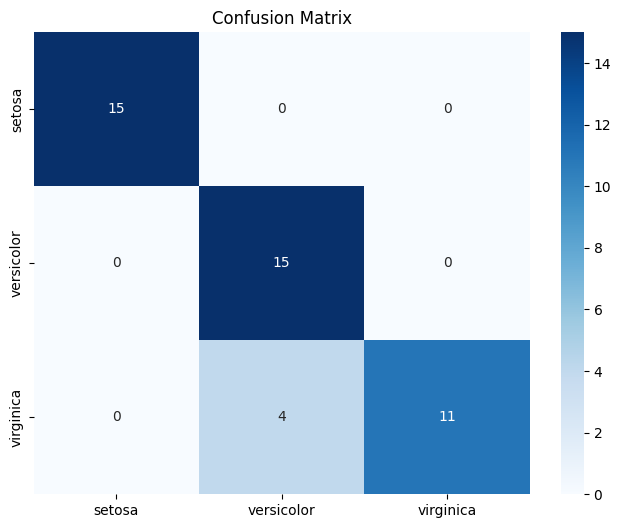

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
print(f"Overall accuracy: {accuracy:.4f}")